Goal:
The primary objective of this analysis was to delve into the relationship between stride length and its impact on pitch speed. The goal was to identify the optimal stride length that would lead to the highest pitch speeds. It's essential to note that this analysis solely focused on numerical data and did not consider factors such as a player's mobility, balance, or other characteristics that can play a role in this dynamic process.

Outcome:
After conducting a comprehensive analysis, it was determined that an optimal stride length of approximately 0.81 of a pitcher's height yielded the fastest pitch speeds. This finding was achieved by running a predictive linear regression model on the dataset. While this result provides valuable insights, it's important to recognize that real-world pitching performance is influenced by a multitude of factors beyond numerical metrics, emphasizing the complexity of the sport.

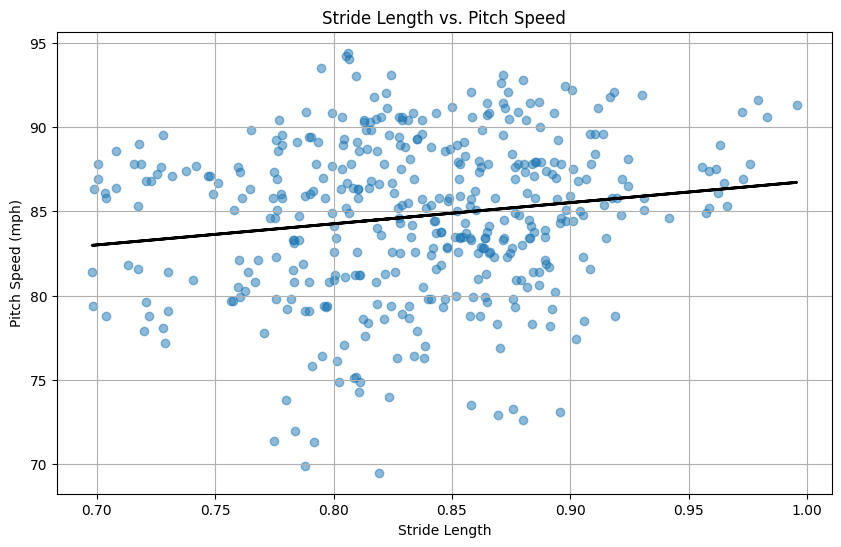

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Load the dataset
data = pd.read_csv("poi_metrics.csv")

# Plot stride length vs. pitch speed
plt.figure(figsize=(10, 6))
plt.scatter(data['stride_length'], data['pitch_speed_mph'], alpha=0.5)
plt.title('Stride Length vs. Pitch Speed')
plt.xlabel('Stride Length')
plt.ylabel('Pitch Speed (mph)')
plt.grid(True)

# Perform linear regression
X = data['stride_length'].values.reshape(-1, 1)
y = data['pitch_speed_mph'].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
y_pred = reg.predict(X)

# Plot the line of best fit
plt.plot(X, y_pred, color='black', linewidth=2)

plt.show()


In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Load the dataset
data = pd.read_csv("poi_metrics.csv")

# Extract unique stride length values from the dataset
stride_lengths = data['stride_length'].unique()

# Initialize variables to keep track of the optimal stride length and maximum pitch speed
optimal_stride_length = None
max_pitch_speed = 0  # Initialize with a low value

# Create a linear regression model
reg = LinearRegression()

# Iterate through each unique stride length and calculate mean pitch speed
for stride_length in stride_lengths:
    # Filter data for the current stride length
    subset_data = data[data['stride_length'] == stride_length]
    
    if not subset_data.empty:
        X_subset = subset_data['stride_length'].values.reshape(-1, 1)
        y_subset = subset_data['pitch_speed_mph'].values.reshape(-1, 1)
        
        # Fit a linear regression model to the subset of data
        reg.fit(X_subset, y_subset)
        
        # Predict pitch speed using the linear regression model
        y_pred_subset = reg.predict(X_subset)
        
        # Calculate the mean pitch speed for this stride length
        mean_pitch_speed = np.mean(y_pred_subset)
        
        # Update optimal values if a higher pitch speed is found
        if mean_pitch_speed > max_pitch_speed:
            max_pitch_speed = mean_pitch_speed
            optimal_stride_length = stride_length

# Print the optimal stride length and maximum pitch speed
print(f"The optimal stride length for the fastest pitch speed is {optimal_stride_length:.2f} of pitchers height.")
print(f"The maximum pitch speed achieved with this stride length is {max_pitch_speed:.2f} mph.")


The optimal stride length for the fastest pitch speed is 0.81 of pitchers height.
The maximum pitch speed achieved with this stride length is 94.40 mph.
